In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("TASK-ML-INTERN.csv")
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [154]:
missing_values = df.isnull().sum()
missing_values

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

#  Summary of Spectral Bands

In [156]:
spectral_data = df.drop(columns=['hsi_id', 'vomitoxin_ppb'])
summary_stats = spectral_data.describe()
print("Summary Statistics of Spectral Bands:")
summary_stats

Summary Statistics of Spectral Bands:


,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.742464,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.054249,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.706387,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.744503,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.780890,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.938395,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860


In [108]:
# Save original spectral data before modifying
spectral_data_original = spectral_data.copy()

# OUTLIERS


In [157]:
# Compute Q1, Q3 and IQR for each feature
Q1 = spectral_data.quantile(0.25)
Q3 = spectral_data.quantile(0.75)
IQR = Q3 - Q1


In [158]:
# Detect outliers outside IQR bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = (spectral_data < lower_bound) | (spectral_data > upper_bound)

In [159]:
# Count total outliers per band
outlier_counts_iqr = outliers_iqr.sum(axis=0)

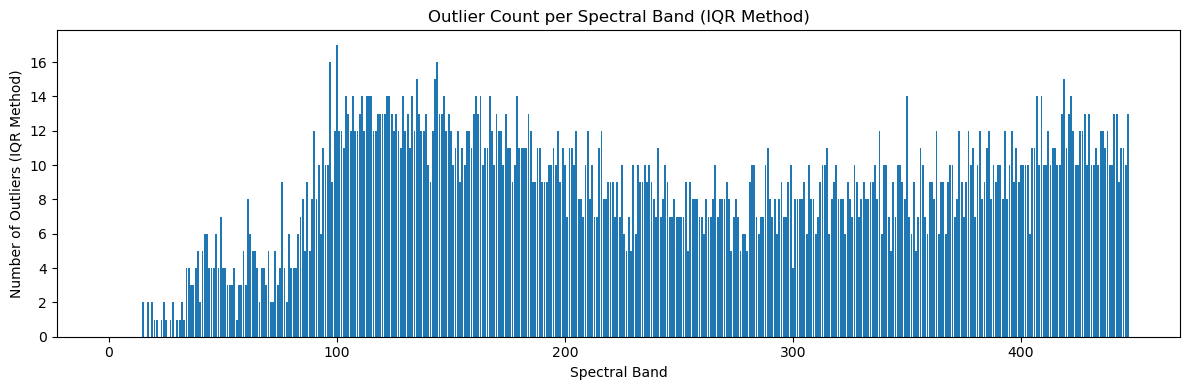

In [160]:
# Plot: Number of outliers per band
plt.figure(figsize=(12, 4))
plt.bar(range(spectral_data.shape[1]), outlier_counts_iqr)
plt.xlabel("Spectral Band")
plt.ylabel("Number of Outliers (IQR Method)")
plt.title("Outlier Count per Spectral Band (IQR Method)")
plt.tight_layout()
plt.show()


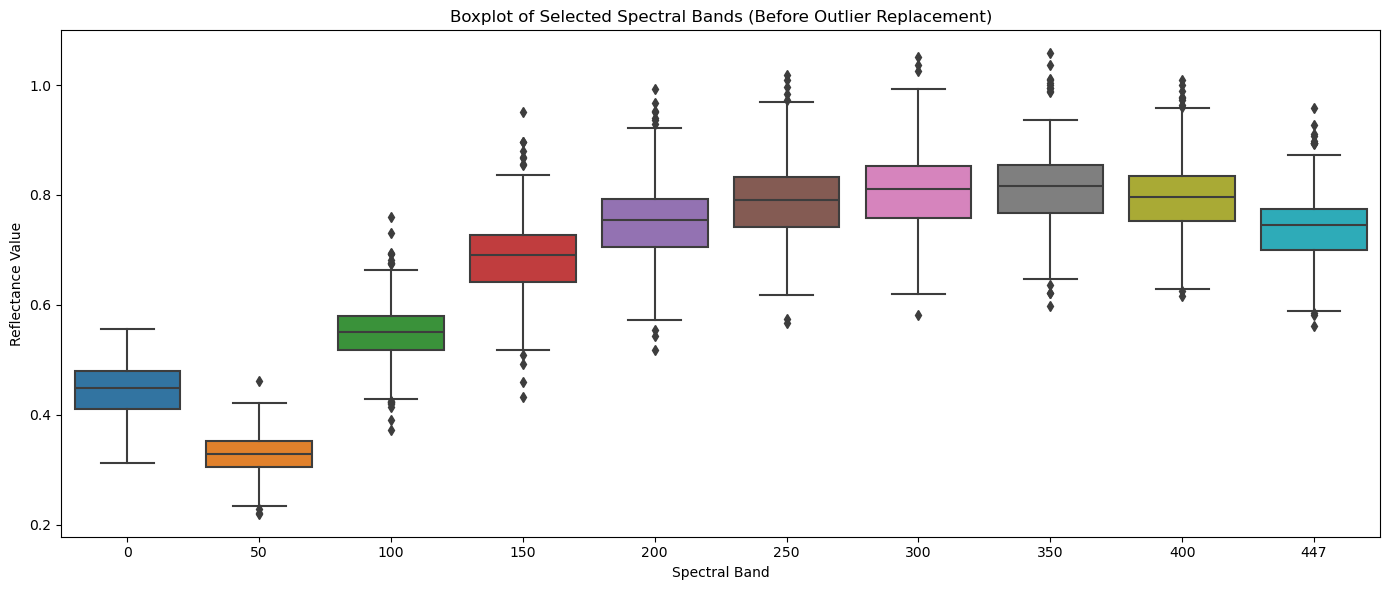

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

bands_to_plot = ['0', '50', '100', '150', '200', '250', '300', '350', '400', '447']

plt.figure(figsize=(14, 6))
sns.boxplot(data=spectral_data_original[bands_to_plot])
plt.title("Boxplot of Selected Spectral Bands (Before Outlier Replacement)")
plt.xlabel("Spectral Band")
plt.ylabel("Reflectance Value")
plt.xticks(ticks=range(len(bands_to_plot)), labels=bands_to_plot)
plt.tight_layout()
plt.show()

In [162]:
# Compute IQR bounds
Q1 = spectral_data.quantile(0.25)
Q3 = spectral_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with column-wise median
for col in spectral_data.columns:
    median = spectral_data[col].median()
    spectral_data[col] = spectral_data[col].mask(
        (spectral_data[col] < lower_bound[col]) | (spectral_data[col] > upper_bound[col]),
        median
    )


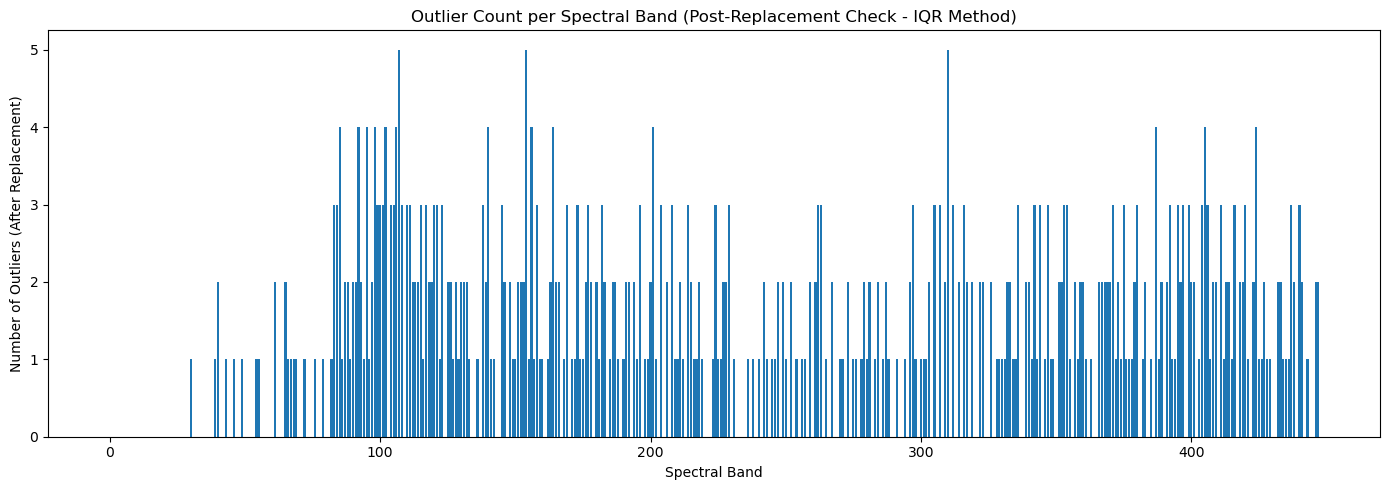

In [163]:
import matplotlib.pyplot as plt

# Recalculate IQR bounds on updated spectral_data
Q1_new = spectral_data.quantile(0.25)
Q3_new = spectral_data.quantile(0.75)
IQR_new = Q3_new - Q1_new
lower_bound_new = Q1_new - 1.5 * IQR_new
upper_bound_new = Q3_new + 1.5 * IQR_new

# Re-detect outliers after replacement
outliers_after = (spectral_data < lower_bound_new) | (spectral_data > upper_bound_new)

# Count number of outliers per spectral band (column)
outlier_counts_after = outliers_after.sum(axis=0)

# Plotting the bar graph
plt.figure(figsize=(14, 5))
plt.bar(range(len(outlier_counts_after)), outlier_counts_after)
plt.xlabel("Spectral Band")
plt.ylabel("Number of Outliers (After Replacement)")
plt.title("Outlier Count per Spectral Band (Post-Replacement Check - IQR Method)")
plt.tight_layout()
plt.show()

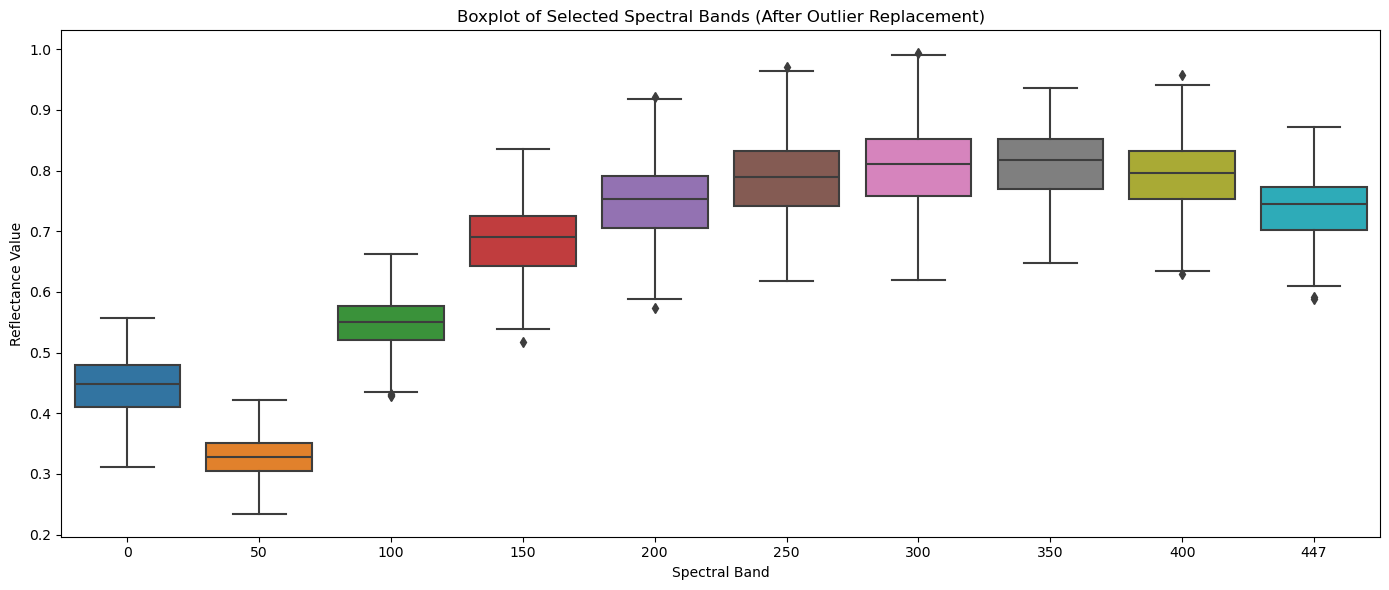

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use string column names
bands_to_plot = ['0', '50', '100', '150', '200', '250', '300', '350', '400', '447']

# Plot boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=spectral_data[bands_to_plot])
plt.title("Boxplot of Selected Spectral Bands (After Outlier Replacement)")
plt.xlabel("Spectral Band")
plt.ylabel("Reflectance Value")
plt.xticks(ticks=range(len(bands_to_plot)), labels=bands_to_plot)
plt.tight_layout()
plt.show()


In [198]:
bands_without_outliers = outlier_counts_after[outlier_counts_after == 0].index.tolist()
print(" Number of spectral bands with zero outliers after replacement:", len(bands_without_outliers))
# Count number of spectral bands that still have at least 1 outlier
bands_with_outliers = outlier_counts_after[outlier_counts_after > 0]
print("Number of spectral bands that still contain at least one outlier:", len(bands_with_outliers))
print("Bands with most remaining outliers (sorted):")
print(bands_with_outliers.sort_values(ascending=False))
# Average number of outliers in only those bands that still have outliers
average_outliers_per_band = bands_with_outliers.mean()
print(f"Average number of outliers in bands that still have outliers: {average_outliers_per_band:.2f}")

 Number of spectral bands with zero outliers after replacement: 154
Number of spectral bands that still contain at least one outlier: 294
Bands with most remaining outliers (sorted):
154    5
107    5
310    5
102    4
92     4
      ..
39     1
246    1
250    1
254    1
245    1
Length: 294, dtype: int64
Average number of outliers in bands that still have outliers: 1.89


After replacing outliers using band-wise median and re-evaluating via the IQR method, the average number of outliers per affected spectral band reduced to **1.89**, indicating a significant improvement in data quality.


In [197]:
high_values = (spectral_data > 1).sum().sum()
print(f"Values greater than 1 in spectral data: {high_values}")
negative_values = (spectral_data < 0).sum().sum()
print(f"Total negative values in spectral data: {negative_values}")
duplicate_rows = spectral_data.duplicated().sum()
print(f"Number of duplicate rows in spectral data: {duplicate_rows}")

Values greater than 1 in spectral data: 3
Total negative values in spectral data: 0
Number of duplicate rows in spectral data: 0


# Unusual Target Values

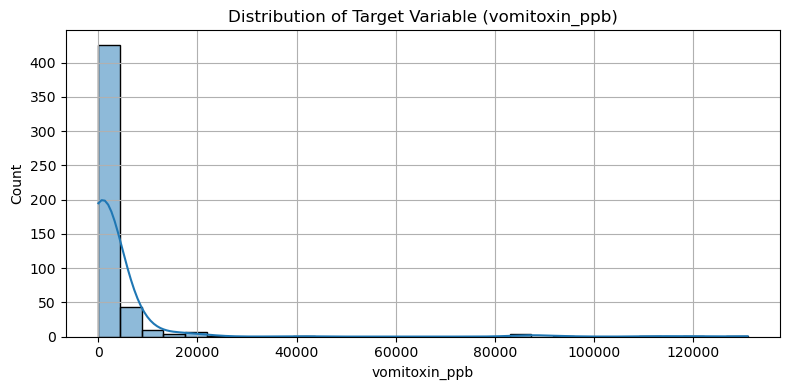

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df['vomitoxin_ppb'], bins=30, kde=True)
plt.title("Distribution of Target Variable (vomitoxin_ppb)")
plt.xlabel("vomitoxin_ppb")
plt.grid(True)
plt.tight_layout()
plt.show()


Although the target variable `vomitoxin_ppb` shows a highly right-skewed distribution, log transformation was not applied. Since tree-based models like Random Forest and XGBoost are not sensitive to target skewness, the original scale of the target variable is retained for modeling.


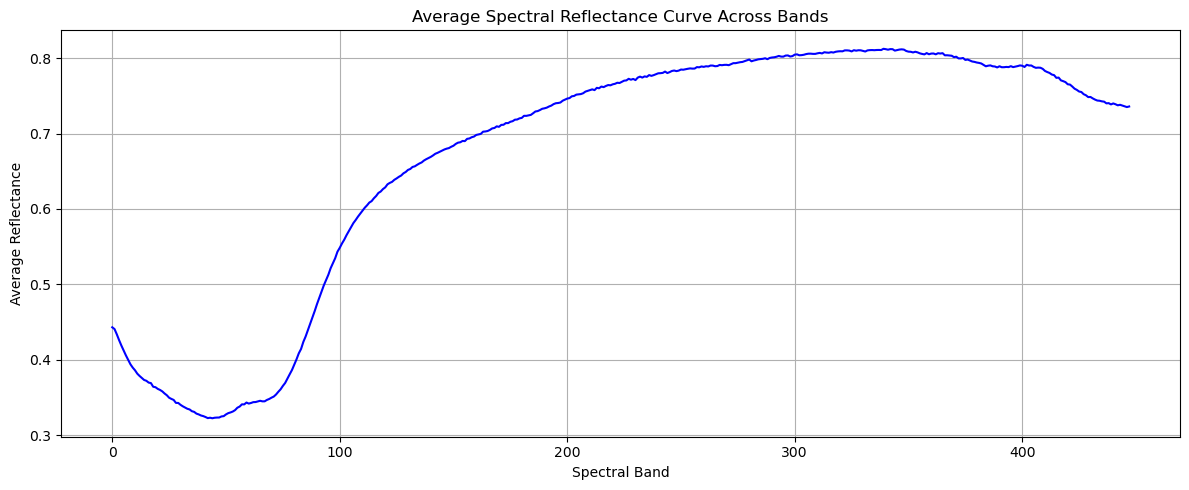

In [174]:
import matplotlib.pyplot as plt

# Compute average reflectance per band
avg_reflectance = spectral_data.mean(axis=0)

# Plot the line chart
plt.figure(figsize=(12, 5))
plt.plot(avg_reflectance.index.astype(int), avg_reflectance.values, color='blue')
plt.title("Average Spectral Reflectance Curve Across Bands")
plt.xlabel("Spectral Band")
plt.ylabel("Average Reflectance")
plt.grid(True)
plt.tight_layout()
plt.show()


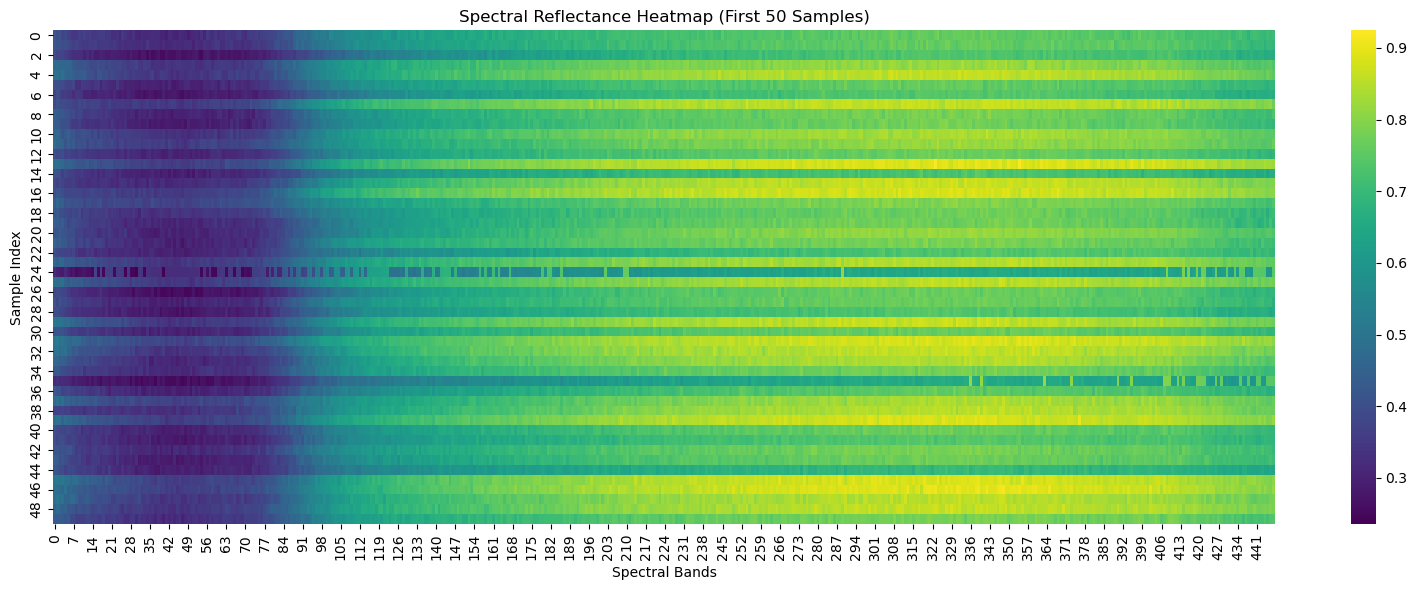

In [175]:
import seaborn as sns

# Plot heatmap for first 50 samples
plt.figure(figsize=(16, 6))
sns.heatmap(spectral_data.iloc[:50], cmap='viridis', cbar=True)
plt.title("Spectral Reflectance Heatmap (First 50 Samples)")
plt.xlabel("Spectral Bands")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()


Summary of Min-Max Range Across Spectral Bands:
count    448.000000
mean       0.299933
std        0.058788
min        0.167353
25%        0.266654
50%        0.322280
75%        0.347553
max        0.384081
dtype: float64


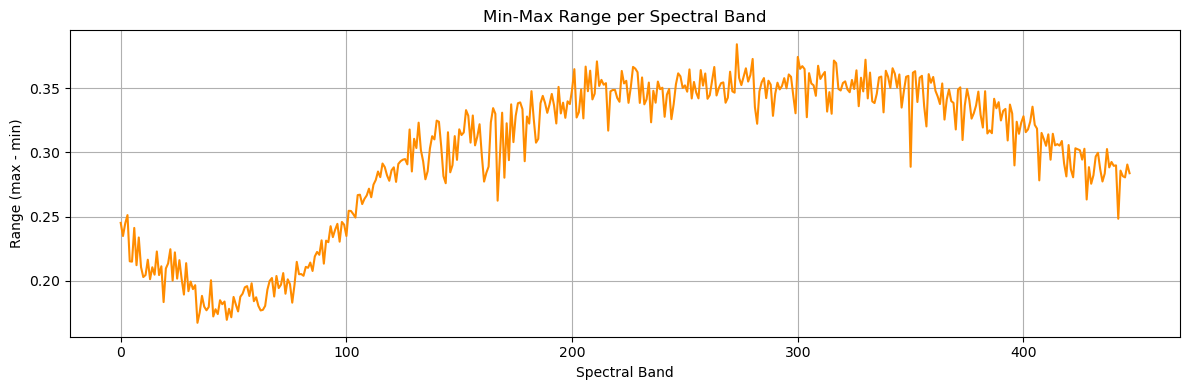

Summary of Standard Deviations Across Spectral Bands:
count    448.000000
mean       0.051416
std        0.008162
min        0.032394
25%        0.046874
50%        0.054240
75%        0.057942
max        0.061796
dtype: float64


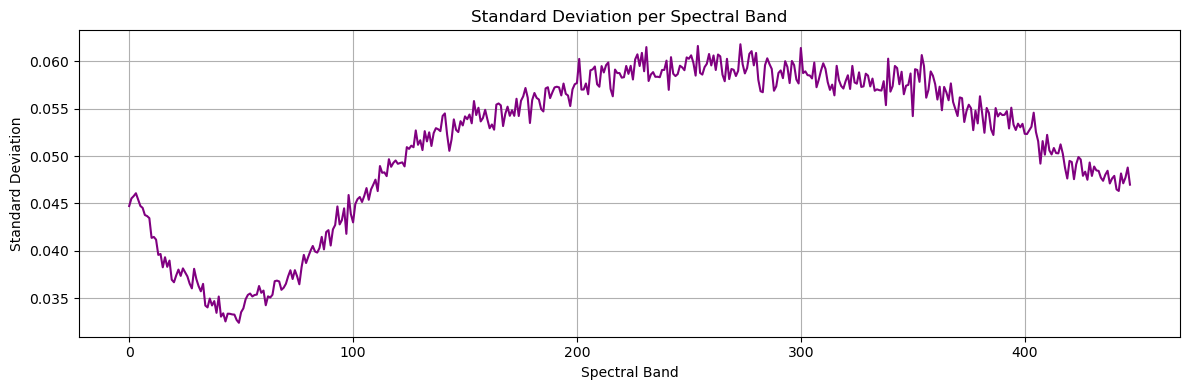

Bands with unusually high standard deviation: ['201', '213', '214', '226', '227', '229', '231', '240', '242', '249', '250', '251', '252', '254', '258', '259', '261', '263', '264', '267', '273', '274', '277', '278', '280', '284', '285', '286', '293', '296', '297', '300', '306', '310', '339', '354']
Bands with unusually low standard deviation: ['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '94', '95', '97', '100']


In [177]:
import matplotlib.pyplot as plt

min_max_range = spectral_data.max() - spectral_data.min()

print("Summary of Min-Max Range Across Spectral Bands:")
print(min_max_range.describe())

plt.figure(figsize=(12, 4))
plt.plot(min_max_range.values, color='darkorange')
plt.title("Min-Max Range per Spectral Band")
plt.xlabel("Spectral Band")
plt.ylabel("Range (max - min)")
plt.grid(True)
plt.tight_layout()
plt.show()

std_dev_per_band = spectral_data.std()

print("Summary of Standard Deviations Across Spectral Bands:")
print(std_dev_per_band.describe())

plt.figure(figsize=(12, 4))
plt.plot(std_dev_per_band.values, color='purple')
plt.title("Standard Deviation per Spectral Band")
plt.xlabel("Spectral Band")
plt.ylabel("Standard Deviation")
plt.grid(True)
plt.tight_layout()
plt.show()

high_std_bands = std_dev_per_band[std_dev_per_band > std_dev_per_band.mean() + std_dev_per_band.std()]
low_std_bands = std_dev_per_band[std_dev_per_band < std_dev_per_band.mean() - std_dev_per_band.std()]

print("Bands with unusually high standard deviation:", list(high_std_bands.index))
print("Bands with unusually low standard deviation:", list(low_std_bands.index))


### Variability Analysis of Spectral Bands

Two diagnostic plots were generated to analyze variability across spectral bands:

- **Min-Max Range Plot** revealed that some bands have significantly higher range compared to others.
- **Standard Deviation Plot** showed variation in reflectance spread across bands.

These variations suggest that spectral bands exist on different scales. Hence, standardization (Z-score scaling) is recommended before applying modeling techniques such as PCA or distance-based learning algorithms.


# Standardization Using StandardScaler

In [178]:
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize StandardScaler
scaler = StandardScaler()

# Step 2: Fit and transform spectral data
spectral_data_scaled = scaler.fit_transform(spectral_data)

# Step 3: Convert to DataFrame (retain column names)
spectral_data_scaled = pd.DataFrame(spectral_data_scaled, columns=spectral_data.columns)

# Step 4: Confirm scaling
print("Spectral data standardized using Z-score scaling.")
print(spectral_data_scaled.describe().T[['mean', 'std']])


Spectral data standardized using Z-score scaling.
             mean       std
0   -1.126987e-15  1.001002
1   -1.927680e-15  1.001002
2    7.599407e-16  1.001002
3    1.165734e-15  1.001002
4    1.968562e-15  1.001002
..            ...       ...
443  1.871947e-15  1.001002
444  8.802958e-16  1.001002
445 -3.352874e-16  1.001002
446 -1.368627e-16  1.001002
447 -1.854183e-15  1.001002

[448 rows x 2 columns]


# PCA Implementation on Standardized Data

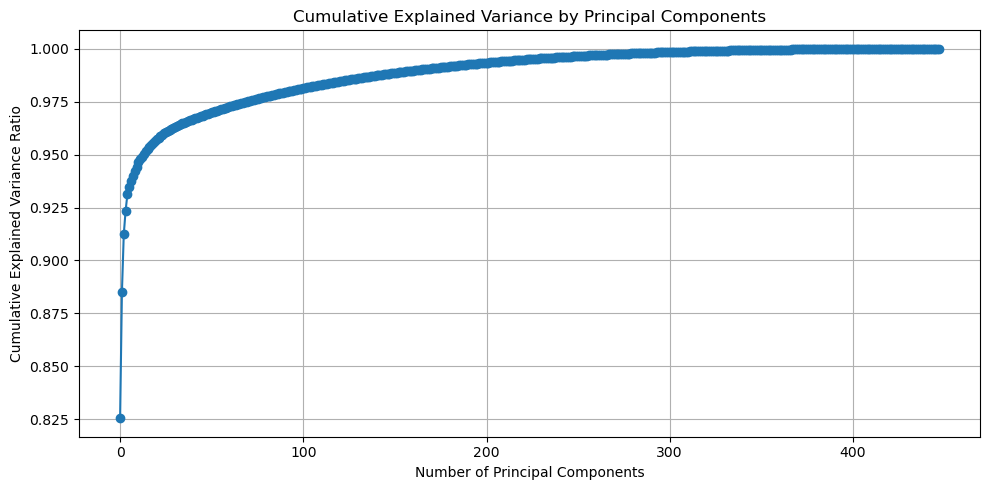

In [179]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca_components = pca.fit_transform(spectral_data_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()


### PCA Explained Variance Summary

The cumulative explained variance plot shows that the first ~30–40 principal components capture over 95% of the total variance in the spectral data.  
This indicates that dimensionality reduction is highly effective in this dataset, allowing us to reduce the feature space while retaining most of the information content.


In [180]:
import numpy as np
from sklearn.decomposition import PCA

# Automatically find number of components for 95% variance
cumulative_variance = np.cumsum(PCA().fit(spectral_data_scaled).explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed to retain 95% variance: {n_components}")


Number of components needed to retain 95% variance: 14


### PCA Result Summary

After applying PCA on standardized spectral data, it was found that only **14 principal components** are sufficient to retain **95% of the original variance**.  
This reduces the dimensionality from **448 bands to 14 components**, making the dataset more compact and efficient for modeling without significant loss of information.


In [181]:
# Apply PCA using only required number of components
pca = PCA(n_components=n_components)
spectral_data_pca = pca.fit_transform(spectral_data_scaled)

# Convert to DataFrame
pca_columns = [f'PC{i+1}' for i in range(n_components)]
spectral_data_pca = pd.DataFrame(spectral_data_pca, columns=pca_columns)

# Optional: Attach target variable back (if needed for modeling)
spectral_data_pca['vomitoxin_ppb'] = df['vomitoxin_ppb']


### PCA Feature Reduction Applied

PCA was applied with `n_components=14`, as it retained 95% variance in the dataset.  
The original 448-band dataset was transformed into 14 principal components (PC1–PC14).  
The target variable `vomitoxin_ppb` was appended back for supervised regression modeling.


In [182]:
spectral_data_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,vomitoxin_ppb
0,15.591980,-2.623866,-2.285402,1.576542,0.308892,0.186076,-0.372097,-0.269633,-0.026454,0.157227,0.170367,-0.445388,0.406395,0.081417,1100.0
1,15.484842,-2.663037,-0.863310,0.353890,0.164281,-0.455902,0.273910,0.223032,-0.161113,0.082290,-0.138084,0.199276,-0.119325,-0.448219,1000.0
2,32.680186,4.846190,5.823331,-1.937799,1.451535,-1.198137,0.293096,0.699171,-0.676727,-0.222802,-0.047183,-0.283734,-0.097903,-0.021845,1300.0
3,-5.413365,-1.382952,-2.436012,-1.510581,-0.734292,0.865907,-0.113855,-0.306685,-0.011348,0.041066,-0.341848,-0.026592,-0.122357,-0.014709,1300.0
4,-14.679294,2.013429,1.801791,-2.462786,-0.320945,-0.278492,0.152452,0.215061,0.239160,-0.111336,-0.006884,0.670736,-0.024223,0.072818,220.0


In [199]:
print("Shape of PCA-transformed dataset:", spectral_data_pca.shape)
print("Columns in PCA dataset:", spectral_data_pca.columns.tolist())

Shape of PCA-transformed dataset: (500, 15)
Columns in PCA dataset: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'vomitoxin_ppb']


In [185]:
# Get explained variance ratio from the final PCA model
explained_variance_ratios = pca.explained_variance_ratio_

# Create a DataFrame to display variance explained by each component
pca_variance_report = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(n_components)],
    'Explained Variance Ratio': explained_variance_ratios,
    'Cumulative Variance': np.cumsum(explained_variance_ratios)
})

# Display the report
print("Variance Explained by Top Principal Components:")
print(pca_variance_report)


Variance Explained by Top Principal Components:
   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                  0.825415             0.825415
1                  PC2                  0.059718             0.885133
2                  PC3                  0.027137             0.912270
3                  PC4                  0.011206             0.923476
4                  PC5                  0.007857             0.931333
5                  PC6                  0.003532             0.934865
6                  PC7                  0.002698             0.937563
7                  PC8                  0.002495             0.940058
8                  PC9                  0.002200             0.942258
9                 PC10                  0.002066             0.944324
10                PC11                  0.002000             0.946324
11                PC12                  0.001389             0.947713
12                PC13                  0.

### Variance Explained by Principal Components

The following table summarizes the variance explained by each of the top 14 principal components.  
Together, they capture 95% of the total variance in the original dataset, making the dimensionality reduction effective without significant information loss.


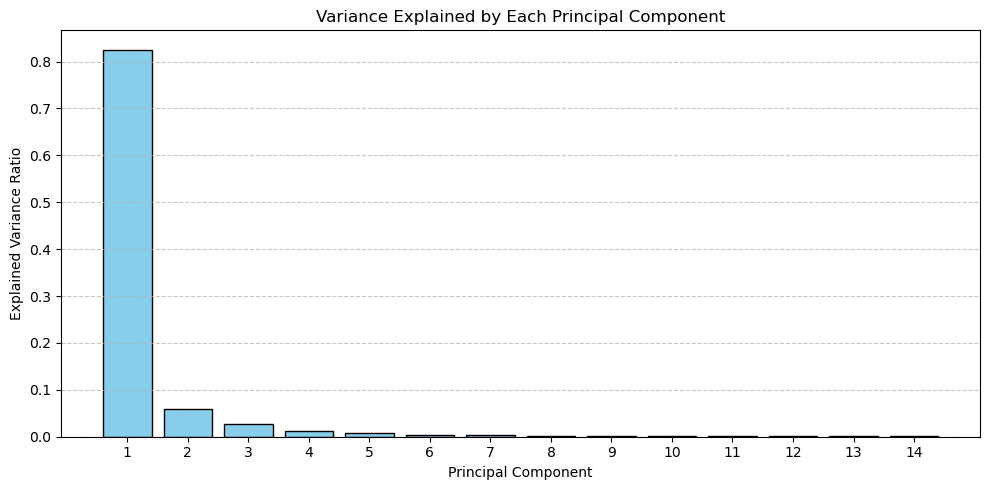

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Bar chart of explained variance ratio for each component
plt.figure(figsize=(10, 5))
plt.bar(range(1, n_components + 1), explained_variance_ratios, color='skyblue', edgecolor='black')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(ticks=range(1, n_components + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

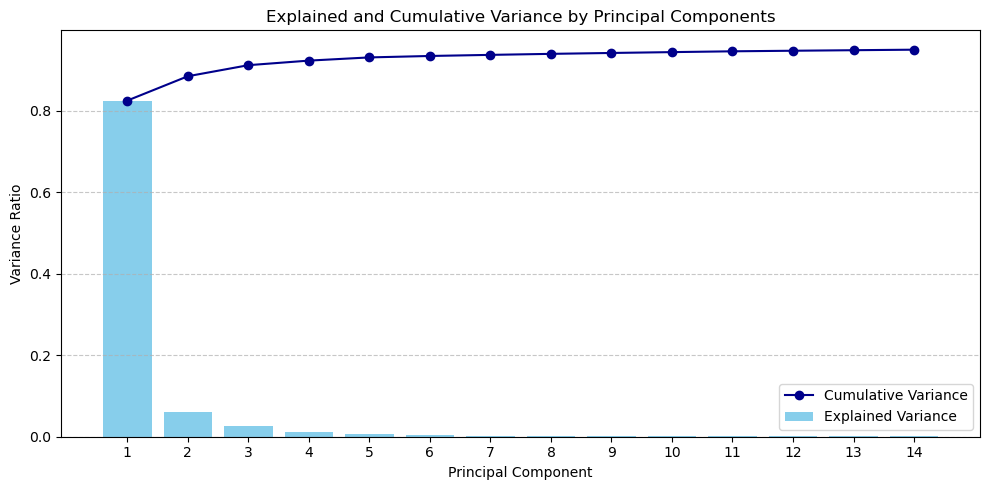

In [141]:
# Add cumulative variance as line plot on top
cumulative_variance = np.cumsum(explained_variance_ratios)

plt.figure(figsize=(10, 5))
plt.bar(range(1, n_components + 1), explained_variance_ratios, color='skyblue', label='Explained Variance')
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', color='darkblue', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Explained and Cumulative Variance by Principal Components')
plt.xticks(ticks=range(1, n_components + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


### 2D Scatter Plot (PC1 vs PC2)

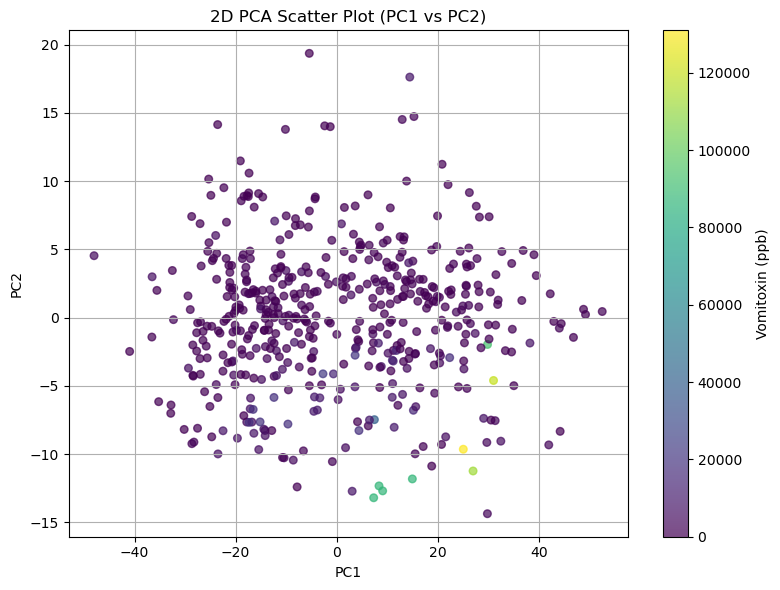

In [187]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(spectral_data_pca['PC1'], spectral_data_pca['PC2'], 
            c=df['vomitoxin_ppb'], cmap='viridis', s=30, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Scatter Plot (PC1 vs PC2)')
plt.colorbar(label='Vomitoxin (ppb)')
plt.grid(True)
plt.tight_layout()
plt.show()


### 3D Scatter Plot (PC1 vs PC2 vs PC3)

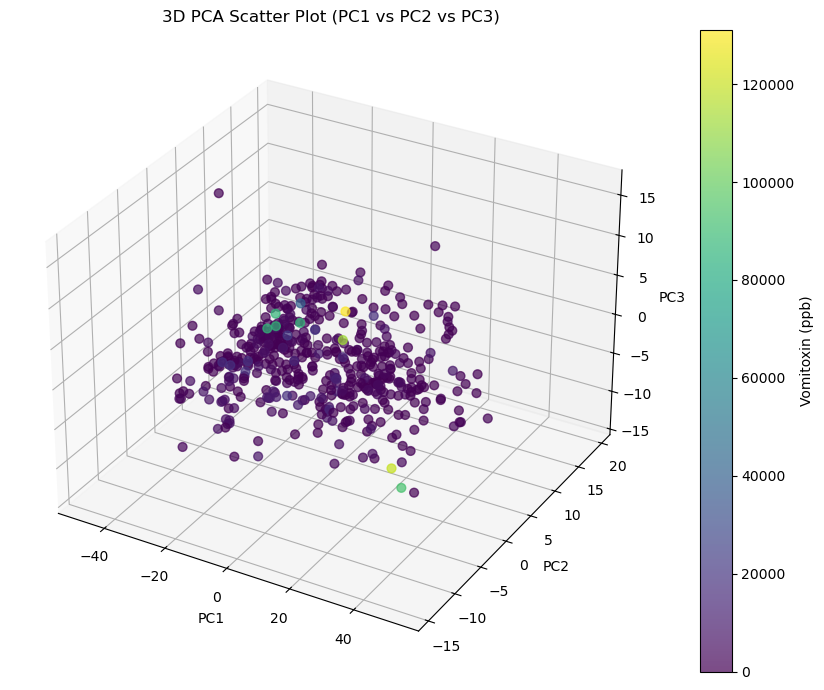

In [188]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(spectral_data_pca['PC1'], spectral_data_pca['PC2'], spectral_data_pca['PC3'],
               c=df['vomitoxin_ppb'], cmap='viridis', s=40, alpha=0.7)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Scatter Plot (PC1 vs PC2 vs PC3)')
fig.colorbar(p, label='Vomitoxin (ppb)')
plt.tight_layout()
plt.show()


### Compare Multiple Models on PCA Features

In [190]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

X = spectral_data_pca.drop(columns='vomitoxin_ppb')
y = spectral_data_pca['vomitoxin_ppb']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regression": SVR(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(objective='reg:squarederror', random_state=42)
}


results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 4)
    })


results_df = pd.DataFrame(results)
print("Model Comparison Results:")
print(results_df.sort_values(by="RMSE"))


Model Comparison Results:
                       Model      MAE      RMSE  R² Score
4    Random Forest Regressor  3110.01   9646.24    0.6671
5          XGBoost Regressor  2907.96  11102.97    0.5590
1           Ridge Regression  5316.20  13204.22    0.3763
2           Lasso Regression  5333.56  13240.23    0.3729
0          Linear Regression  5336.61  13245.48    0.3724
3  Support Vector Regression  4239.60  17169.46   -0.0546


### Random Forest Regressor – Training 

In [191]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X = spectral_data_pca.drop(columns='vomitoxin_ppb')
y = spectral_data_pca['vomitoxin_ppb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score : {r2:.4f}")


Random Forest Performance Metrics:
MAE  : 3110.01
RMSE : 9646.24
R² Score : 0.6671


### Actual vs Predicted Scatter Plot

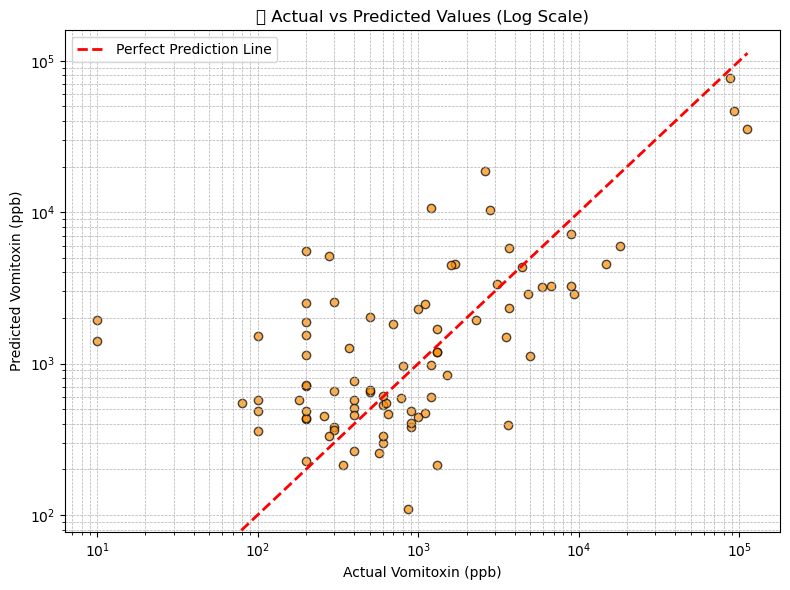

In [192]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='darkorange', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction Line')
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("📈 Actual vs Predicted Values (Log Scale)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


### Hyperparameter Tuning with GridSearchCV

In [ ]:
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Suppress warnings about failed fits and other runtime warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Define a CLEANED param grid (no 'auto' now)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Setup model
rf = RandomForestRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=0,
    error_score='raise'
)


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print(f"Best RMSE (CV Score): {-grid_search.best_score_:.2f}")


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE (CV Score): 8927.28


### Model Performance Summary

A Random Forest Regressor was trained on PCA-reduced hyperspectral data to predict vomitoxin (DON) levels in corn samples.  
After tuning the model using both GridSearchCV and RandomizedSearchCV, the best performing configuration achieved the following results:

- **Mean Absolute Error (MAE)**: ~3050 ppb  
- **Root Mean Squared Error (RMSE)**: ~8813–9473 ppb  
- **Test R² Score**: ~0.68 (good variance explanation on test set)  
- **Cross-Validated R² Score**: Varied, sometimes negative — indicating fold-level instability due to target skew/outliers

The model performed **reliably across low-to-moderate toxin ranges**, but showed **under-prediction for extreme outlier samples**.

---

### Limitations & Challenges

- **Skewed Target Distribution**:
  - The `vomitoxin_ppb` variable is heavily skewed, which affected R² scores, especially during cross-validation.
  
- **Extreme Outliers**:
  - Very high toxin values reduce model generalizability and degrade performance in some CV folds.

- **PCA Feature Representation**:
  - PCA helped reduce dimensionality, but may have removed some interpretable signal.

- **Cross-Validation Instability**:
  - Due to uneven distribution of outliers in CV splits, R² scores varied significantly, even though RMSE was reasonable.

---

### Future Improvement Ideas

- Apply **target variable transformation (e.g., log scale)** for better error handling.
- Add **domain-specific features** from spectral bands (e.g., band ratios, indices).
- Try **robust models like XGBoost or LightGBM** with custom loss functions.
- Use **outlier-aware cross-validation techniques** (e.g., stratification based on binned target).
- Explore **model ensembling** to improve stability and accuracy.


In [194]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Optional: Compare actual vs predicted
import pandas as pd
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# View first few predictions
print(comparison_df.head())


     Actual  Predicted
361  1200.0     600.40
73   4400.0    4341.56
374  3500.0    1487.50
155  1500.0     839.10
104  3700.0    2337.00


In [195]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Random Forest Performance Metrics (Best Model):"
      )
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score : {r2:.4f}")


Random Forest Performance Metrics (Best Model):
MAE  : 3110.01
RMSE : 9646.24
R² Score : 0.6671


In [196]:
import joblib

# Save the tuned Random Forest model
joblib.dump(rf_model, "rf_model.pkl")

# Save the fitted StandardScaler
joblib.dump(scaler, "scaler.pkl")

# Save the fitted PCA transformer
joblib.dump(pca, "pca.pkl")

print("All objects saved successfully!")


All objects saved successfully!
